# PROGETTO MOBD

## Import Packege

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# Rimpiazzo NaN
from sklearn.impute import KNNImputer
# ELimino Outliers Multivariati
from collections import Counter
from sklearn.cluster import DBSCAN
# Spit Dati
import sklearn.model_selection as model_select
# Robba per Pipeline
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
# Features selections
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [2]:
#Importo dati
dataset = pd.read_csv('training_set.csv')
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,CLASS
0,-0.555694,-0.848258,0.132180,-4.061760,1.661394,2.219988,0.360537,2.537116,-0.613588,2.078144,...,-2.492234,0.808907,-1.078887,3.438161,2.372122,1.899934,2.372122,2.219416,0.132180,2
1,0.293193,-2.628978,-1.154407,0.538828,-0.169857,3.487574,0.443397,-0.006410,-0.125778,1.223669,...,-1.723842,1.772836,0.467387,-1.501851,-3.599221,-0.968531,-3.599221,1.127776,-1.154407,0
2,-2.078656,-0.834492,1.241461,1.010122,-1.638526,0.247378,-1.887390,-1.331368,-2.159086,0.002788,...,-1.686278,-1.047410,-1.133299,-1.953928,-1.149684,1.111692,-1.149684,0.134184,1.241461,1
3,-1.294256,-2.804065,-1.335397,-1.351379,-0.327137,1.199219,0.262458,0.825120,-0.638883,1.660732,...,4.437570,-0.093413,2.637345,-2.415704,-4.679002,0.511314,-4.679002,0.805571,-1.335397,0
4,-0.525611,0.024948,1.609361,-0.248425,1.533188,0.580862,0.049771,-0.430270,-0.714264,-0.186867,...,0.404803,-0.733368,1.288384,-1.646543,-1.020989,0.658584,-1.020989,1.412792,1.609361,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.405098,0.592920,2.441859,-1.134919,2.248627,2.509097,-0.227617,0.275321,-0.274926,-0.595862,...,-0.169544,-0.255823,2.695956,-2.220396,-2.432903,-0.131110,-2.432903,-0.479939,2.441859,1
7996,-0.404388,1.813804,-2.483380,2.093664,0.139423,2.617027,0.489677,1.387914,-0.363073,0.030530,...,0.124103,0.056482,-0.333988,-1.204211,-0.224673,1.521622,-0.224673,-1.096852,-2.483380,2
7997,0.233546,-1.003142,-2.121826,1.581558,1.152723,-0.987152,0.337969,-4.654229,-0.417682,-1.260857,...,2.469214,2.782867,0.888288,0.335607,-2.248307,-1.386542,-2.248307,0.934043,-2.121826,0
7998,1.120382,0.194409,-0.672968,0.005154,2.290353,4.112554,0.720367,0.563533,-1.009534,-1.551473,...,0.607569,3.102179,4.237942,-0.710731,-0.359420,-1.500903,-0.359420,-0.658633,-0.672968,1


In [3]:
# Separiamo i valori dalle features dalle classi
target = 'CLASS'
x = dataset.drop(target, axis=1)
print('Variabili Indipendenti X:\n', x)
# Separiamo i valori delle Classi dalle features
y = dataset[[target]]
print('\nVariabili Dipendenti Y:\n', y)
# Lista delle features
features_list = x.columns.values.tolist()
print('Lista Features:\n', features_list)

Variabili Indipendenti X:
             F1        F2        F3        F4        F5        F6        F7  \
0    -0.555694 -0.848258  0.132180 -4.061760  1.661394  2.219988  0.360537   
1     0.293193 -2.628978 -1.154407  0.538828 -0.169857  3.487574  0.443397   
2    -2.078656 -0.834492  1.241461  1.010122 -1.638526  0.247378 -1.887390   
3    -1.294256 -2.804065 -1.335397 -1.351379 -0.327137  1.199219  0.262458   
4    -0.525611  0.024948  1.609361 -0.248425  1.533188  0.580862  0.049771   
...        ...       ...       ...       ...       ...       ...       ...   
7995  0.405098  0.592920  2.441859 -1.134919  2.248627  2.509097 -0.227617   
7996 -0.404388  1.813804 -2.483380  2.093664  0.139423  2.617027  0.489677   
7997  0.233546 -1.003142 -2.121826  1.581558  1.152723 -0.987152  0.337969   
7998  1.120382  0.194409 -0.672968  0.005154  2.290353  4.112554  0.720367   
7999  0.994641 -1.185386 -3.610239  0.185566 -1.534623  3.021333 -0.721372   

            F8        F9       F10  

## Rimpiazzo subito i NaN

In [4]:
# Funzione base per il calcolo dei NaN
def get_na_count(dataset):
    # per ogni elemento (i,j) del dataset, isna() restituisce 
    # TRUE/FALSE se il valore corrispondente è mancante/presente
    boolean_mask = dataset.isna()
    # contiamo il numero di TRUE per ogni attributo sul dataset
    return boolean_mask.sum(axis=0)

In [5]:
summary_nan_1 = get_na_count(x)
print(summary_nan_1)

F1      6
F2      6
F3      1
F4      1
F5      4
F6      6
F7      4
F8      9
F9      6
F10     6
F11     5
F12     6
F13     3
F14    10
F15     2
F16     6
F17     4
F18     7
F19     5
F20     3
dtype: int64


In [6]:
imputer = KNNImputer(n_neighbors=2)
dati_imputati = imputer.fit(x).transform(x)
summary_nan_2 = get_na_count(pd.DataFrame(dati_imputati))
print(summary_nan_2)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64


In [7]:
# Dataset senza NaN
X_imputer = pd.DataFrame(dati_imputati)

In [8]:
X_imputer.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.012763,-0.261770,-0.355985,-0.107223,-0.505726,0.171859,-0.142593,0.136592,-0.004754,0.017493,-0.100276,0.000523,-0.051111,-0.010730,0.033355,-0.294075,-0.026589,-0.293967,0.000654,-0.356006
std,1.006266,1.852754,1.794632,3.038180,1.818525,3.801289,1.902182,1.845978,1.005285,1.005351,5.071869,1.959944,1.936157,2.068932,2.013369,1.970577,0.978275,1.970967,0.996563,1.794525
min,-4.181155,-6.980290,-7.563245,-13.133565,-9.011808,-15.887455,-7.934826,-8.608330,-3.472781,-3.697495,-19.416383,-7.212589,-8.133189,-7.823196,-8.969136,-7.037129,-3.621038,-7.037129,-4.013615,-7.563245
25%,-0.697289,-1.441506,-1.563905,-1.853387,-1.734750,-2.186274,-1.412976,-1.098820,-0.684826,-0.671742,-3.443353,-1.324990,-1.336281,-1.382711,-1.298096,-1.611778,-0.689233,-1.612217,-0.669329,-1.563380
50%,-0.028030,-0.261043,-0.374563,-0.021507,-0.511772,0.087551,-0.117258,0.146639,0.003925,0.028194,0.076018,-0.037385,-0.066816,-0.036499,-0.033036,-0.308584,-0.035249,-0.308293,-0.005563,-0.374563
75%,0.665953,0.944838,0.824602,1.757076,0.688574,2.445656,1.121624,1.411258,0.664399,0.704030,3.373809,1.285592,1.244561,1.365567,1.314574,1.021980,0.635102,1.022347,0.675878,0.824602
max,3.774161,7.155359,6.774458,10.975842,6.420768,17.343261,7.222491,6.664533,3.811616,3.391975,19.260556,7.181241,8.819808,7.970802,9.235606,9.415568,3.951352,9.415568,3.606960,6.774458


## Dataset senza NaN --> Ora eliminare Outliers Multivariati

In [9]:
Scanner = DBSCAN(eps=6.6, min_samples=10,n_jobs = -1).fit(X_imputer)
print('Nei_cluster, Fuori_Cluster -->',Counter(Scanner.labels_))
print('Numero di outliersMultivariti trovati -->', Scanner.labels_[Scanner.labels_ == -1] .size)
Outliers = X_imputer[Scanner.labels_==-1].index.values
print('Indici degli Outliers:\n', Outliers)
x_final = pd.DataFrame(X_imputer).drop(index = Outliers)
y_final = y.drop(index = Outliers)


Nei_cluster, Fuori_Cluster --> Counter({0: 7861, -1: 139})
Numero di outliersMultivariti trovati --> 139
Indici degli Outliers:
 [   9   18  112  300  309  403  435  476  490  565  635  643  654  764
  765  850  870  961  976 1005 1013 1037 1039 1229 1302 1304 1362 1363
 1472 1517 1574 1586 1589 1592 1707 1776 1824 1841 1880 1935 2003 2035
 2071 2116 2157 2391 2431 2433 2517 2542 2624 2674 2681 2696 2797 2857
 2964 3007 3022 3066 3119 3207 3227 3404 3412 3417 3430 3622 3702 3910
 3955 4005 4031 4111 4135 4147 4182 4242 4368 4383 4400 4485 4582 4650
 4865 4893 4933 5062 5219 5307 5436 5445 5512 5552 5768 5790 5809 5925
 5951 5967 6016 6023 6058 6113 6119 6206 6227 6243 6281 6358 6549 6560
 6577 6665 6678 6714 6754 6808 6872 6879 6950 6975 7093 7105 7166 7184
 7193 7304 7330 7357 7380 7451 7484 7625 7668 7730 7750 7889 7897]


## Ora Possiamo effettuare Split in Training set e Test Set

In [10]:
# Split in training-set e test-set.
train_x, test_x, train_y, test_y = \
        model_select.train_test_split(x_final, y_final,
                                      test_size=0.2,
                                      random_state=42,
                                      stratify=y_final)
print('\nTraining set shape:', train_x.shape, train_y.shape)
print('Test set shape:', test_x.shape, test_y.shape)


Training set shape: (6288, 20) (6288, 1)
Test set shape: (1573, 20) (1573, 1)


In [11]:
oversample = SMOTE()
train_x, train_y = oversample.fit_resample(train_x, train_y)
print(train_x.size)
print(train_y.size)

170000
8500


## Ora eseguiamo le Pipeline

In [12]:
# Creiamo la classe che rimpiazza gli outliers che ci servira per pipeline e perchè KNN non rimpiazza direttamente gli outliers
# ma i nan quindi bisogna anche ricreare il metodo fit e il trasform

class KNNReplacerIQR(KNNImputer):
    """Pipeline-compliant KNNReplacer, based on IQR."""

    def __init__(self, n_neighbors=2):
        super().__init__(n_neighbors=n_neighbors)
        self.lower_bound = None
        self.upper_bound = None
        self.imputer = KNNImputer(n_neighbors=n_neighbors)

    def fit(self, x, y=None):
        """Computes IQR bound and fits the imputer on the data."""
        x = pd.DataFrame(x)
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound = q1 - (1.5* iqr)
        self.upper_bound = q3 + (1.5* iqr)
        self.imputer.fit(
            x.where(~((x < self.lower_bound) | (x > self.upper_bound)), np.nan)
        )
        return self

    def transform(self, x, y=None):
        """Detects outliers and replaces them with the imputer."""
        x = pd.DataFrame(x)
        x.where(~((x < self.lower_bound) | (x > self.upper_bound)),
                np.nan,
                inplace=True)
        return self.imputer.transform(x)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
# Pipeline Principale
Pipe_Knn_Bagging = Pipeline([   ('replacer', KNNReplacerIQR()),
                                ('pre-process-QDA',PolynomialFeatures(degree=3)),
                                ('scaler',StandardScaler()),
                                ('decomposition',PCA(random_state = 42)),
                                ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
                                ('classifier',BaggingClassifier(
                                                 base_estimator=QDA(reg_param = 0.001,store_covariance =True,tol = 0.001),
                                                 n_jobs = -1,
                                                 random_state = 42))
                            ])

In [75]:
grid_Pipe_Knn_Bagging = {'replacer__n_neighbors': [2]}

In [76]:
gs_Bagging_knn = model_select.GridSearchCV( Pipe_Knn_Bagging ,
                                               param_grid =  grid_Pipe_Knn_Bagging,
                                               scoring='f1_macro',
                                               cv=5,
                                               refit=True,
                                               n_jobs=-1)

In [77]:
# Lista pipeline
grids = [gs_Bagging_knn]
#Dizionario delle pipeline
grid_dict_pipe = {0:'BAGGING-KNN'}

## Prova le Pipeline

In [78]:
# Fit the grid search objects and look for the best model.
print("\nMODEL OPTIMIZATIONS STARTED")
best_f1 = 0.0
best_idx = 0
best_pipe = None
for idx, pipe_gs in enumerate(grids):
    print('Currently trying model: %s' % grid_dict_pipe[idx])
    print(pipe_gs)

    # Perform grid search.
    pipe_gs.fit(train_x, train_y[target])

    # Dump detailed scores on a file.
    results_file = open(grid_dict_pipe[idx] + '_results.txt', 'w')

    # Print scores and update bests.
    print("\nGrid scores:")
    means = pipe_gs.cv_results_['mean_test_score']
    stds = pipe_gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds,
                                 pipe_gs.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r" % (mean, std * 2, params))
        results_file.write("%0.4f (+/-%0.03f) for %r\n"
                           % (mean, std * 2, params))
    print("\nBest parameters:")
    print(pipe_gs.best_params_)
    print("\nBest score: %0.4f" % pipe_gs.best_score_)
    if pipe_gs.best_score_ > best_f1:
        best_f1 = pipe_gs.best_score_
        best_idx = idx
        best_pipe = pipe_gs.best_estimator_
    results_file.write("\nBest parameters:\n%r\n" % pipe_gs.best_params_)
    results_file.write("\nBest score: %0.4f\n" % pipe_gs.best_score_)

    results_file.close()


MODEL OPTIMIZATIONS STARTED
Currently trying model: BAGGING-KNN
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('replacer', KNNReplacerIQR()),
                                       ('pre-process-QDA',
                                        PolynomialFeatures(degree=3)),
                                       ('scaler', StandardScaler()),
                                       ('decomposition', PCA(random_state=42)),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LinearSVC(C=0.01,
                                                                            dual=False,
                                                                            penalty='l1'))),
                                       ('classifier',
                                        BaggingClassifier(base_estimator=QuadraticDiscriminantAnalysis(reg_param=0.001,
                                                                  

In [79]:
print('\nPipeline with best training set F1 macro score: %s'
          % grid_dict_pipe[best_idx])


Pipeline with best training set F1 macro score: BAGGING-KNN


In [80]:
def show_confusion_matrix(cm, f1_score, title):
    """Displays confusion matrix with annotations."""
    # Create annotations label.
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages =\
        ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    box_labels =\
        [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0], cm.shape[1])
    # Show confusion matrix with heat map.
    sns.heatmap(cm,
                annot=box_labels,
                fmt="",
                cmap="YlGnBu",
                cbar=False,
                linewidths=1.0)\
        .set(title=title,
             xlabel='Predicted class\n\nF1 macro: %0.4f' % f1_score,
             ylabel='Actual class')
    plt.show()

In [81]:
def evaluate_classifier(classifier, data_x, data_y, matrix_title='', show=True):
    """Preprocesses test set and evaluates classifiers."""
    pred_y = classifier.predict(data_x)
    confusion_matrix = metrics.confusion_matrix(data_y, pred_y)
    f1_score = metrics.f1_score(data_y, pred_y, average='macro')
    if show:
        show_confusion_matrix(confusion_matrix, f1_score, matrix_title)
    return f1_score

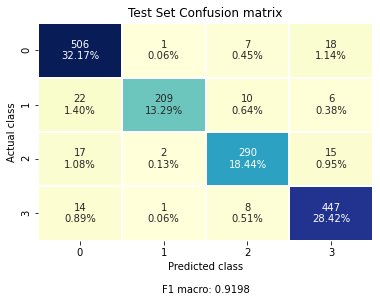


Test set F1 macro: 0.9198


In [86]:
# Evaluates the pipeline on the test set.
print('\nTest set F1 macro: %0.4f'
          % evaluate_classifier(best_pipe,
                                test_x,
                                test_y[target],
                                'Test Set Confusion matrix'))


RE-FITTING BEST PIPELINE ON WHOLE DATASET


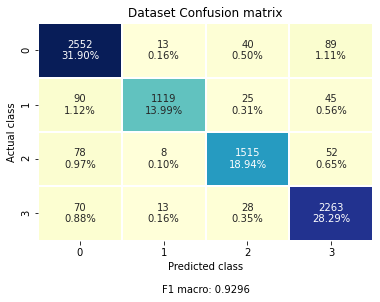


(Pre-save) Dataset F1 macro: 0.9296


In [83]:
# Refit the best pipeline on the whole dataset.
print("\nRE-FITTING BEST PIPELINE ON WHOLE DATASET")
best_pipe = best_pipe.fit(x, y[target])
print('\n(Pre-save) Dataset F1 macro: %0.4f'
          % evaluate_classifier(best_pipe,
                                x,
                                y[target],
                                'Dataset Confusion matrix'))

In [84]:
# Serialize and dump the best model.
pipeline_path = 'best_pipeline.sav'
with open(pipeline_path, 'wb') as model_file:
        pickle.dump(best_pipe, model_file)

In [85]:
# Reload best model and check if the save went well.
with open(pipeline_path, 'rb') as model_file:
        model = pickle.load(model_file)
print('\n(Post-save) Dataset F1 macro: %0.4f'
          % evaluate_classifier(model,
                                x,
                                y[target],
                                show=False))


(Post-save) Dataset F1 macro: 0.9296
